# Проект "Анализ факторов, влияющих на успех продаж игр"

**Описание проекта**: Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед мной данные до 2016 года. Представим, что сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли я продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
   
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования**: Выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**: 
- Подготовка данных: загрузка и изучение общей информации из предоставленного датасета;
- Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий;
- Расширение набора данных: добавление нового столбца - суммарные продажи во всех регионах;
- Исследовательский анализ данных: 
    - посмотреть, сколько игр выпускалось в разные годы;
    - посмотреть, как менялись продажи по платформам;
    - определить какие платформы лидируют по продажам, растут или падают;
    - построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
    - посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
    - посмотреть на общее распределение игр по жанрам.
- Составление портрета пользователя каждого региона;
- Проверка гипотез.

**Описание данных**:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Общий вывод**: Резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## Загрузка данных

In [2]:
# считаем CSV-файл с данными с помощью библиотеки pandas и сохраним в датафрейм
data_games = pd.read_csv('/Users/numberone/Documents/Projects/datasets/games.csv')

In [3]:
# выведем первые 10 cтрок таблицы data_games
display(data_games.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# посмотрим общую информацию о каждом датафрейме
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# посмотрим сводную статистику всех числовых столбцов
data_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**

Видим в данных data_games 16715 строк и 11 столбцов, вес датафрейма - 1,4 MB; столбцы Name, Platform, Genre, User_Score и Rating имеют тип данных - object; столбцы Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales и Critic_Score имеют тип данных - float64.
   
Необходимо привести названия столбцов к нижнему регистру.

Изменить тип данных столбцов Year_of_Release и Critic_Score на int64 (т.к. значения должны быть целочисленными), столбец User_Score на float64.

В столбцах содержатся пропуски, обработаем их в следующем разделе.

## Предобработка данных

### Заменим названия столбцов (приведем к нижнему регистру)

In [6]:
data_games.columns = data_games.columns.str.lower()
display(data_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Проверим наличие пропущенных значений и дубликатов в датафрейме и обработаем

In [7]:
# посчитаем количество пропущенных значений в датафрейме
print(f'Количество пропущенных значений в data_games: {data_games.isna().sum().sum()}')

# посчитаем количество явных дубликатов в датафрейме
print(f'Количество явных дубликатов в data_games: {data_games.duplicated().sum()}')

Количество пропущенных значений в data_games: 22318
Количество явных дубликатов в data_games: 0


In [8]:
# посмотрим на неявные дубликаты
data_games[data_games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Видим две похожие строки под номером 659 и 14244, эти данные не подлежат восстановление, поэтому можно их удалить.

Строку 604 с неявным дубликатом удалять нельзя, т.к. она содержит данные по продажам в Северной Америке и соответственно строку 16230 тоже нельзя удалить, т.к. она содержит данные о продажах в Европе. Объединим эти две строки.

In [9]:
# удалим строки 659 и 14244
data_games.drop(index=[659, 14244], axis=0, inplace=True)

In [10]:
# cложим значения 'eu_sales' в строках с неявными дубликатами
pd.options.mode.chained_assignment = None
data_games.eu_sales[604] = data_games.eu_sales[604] + data_games.eu_sales[16230]

# удалим строку дубликата
data_games.drop(index=[16230], axis=0, inplace=True)

# проверим
data_games.loc[
    (data_games['name'] == 'Madden NFL 13') & 
    (data_games['platform'] == 'PS3') & 
    (data_games['year_of_release'] == 2012)
]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


In [11]:
data_games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [12]:
# посмотрим долю пропусков для дальнейшей обработки 
pd.DataFrame(round(data_games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


#### Столбец name

In [13]:
# видим, что в стоблце name 2 пропуска, удалим их, удаление такого малого количества никак не повлияет на исследование
data_games = data_games.dropna(subset = ['name'])
data_games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### Столбец year_of_release

In [14]:
# посчитаем процент пропусков в столбце year_of_release от всего датафрейма
'{:.1%}'.format((data_games[data_games['year_of_release'].isna()].shape[0]/data_games['year_of_release'].shape[0]))

'1.6%'

In [15]:
# удалим строки с пропусками в столбце year_of_release, будет потерено 1.6% строк с данными, что не является кричным
data_games = data_games.dropna(subset = ['year_of_release'])
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

#### Столбец critic_score

In [16]:
# посчитаем процент пропусков в столбце critic_score от всего датафрейма
'{:.1%}'.format((data_games[data_games['critic_score'].isna()].shape[0]/data_games['critic_score'].shape[0]))

'51.5%'

Видим большое количество пропусков (возможно вследствие технического фактора или человеческого - оценки просто не были проставлены), поэтому будет неправильным удаление их. Каждая оценка индивидуальна и ее не получится заменить средним или медианным значением, поэтому оставим пропуски в данном столбце и заменим их 0.

In [17]:
data_games['critic_score'] = data_games['critic_score'].fillna('0')
data_games['critic_score']

0        76.0
1           0
2        82.0
3        80.0
4           0
         ... 
16710       0
16711       0
16712       0
16713       0
16714       0
Name: critic_score, Length: 16443, dtype: object

#### Столбец user_score 

In [18]:
# посчитаем процент пропусков в столбце user_score от всего датафрейма
'{:.1%}'.format((data_games[data_games['user_score'].isna()].shape[0]/data_games['user_score'].shape[0]))

'40.2%'

Видим большое количество пропусков (возможно вследствие технического фактора или человеческого - оценки пользователей просто не были проставлены), поэтому будет неправильным удаление их. Каждая оценка индивидуальна и ее не получится заменить средним или медианным значением, поэтому оставим пропуски в данном столбце и заменим их 0. Также видно, что пропуски в столбце сritic_score часто совпадают с пропусками в столбце user_score.

In [19]:
data_games['user_score'] = data_games['user_score'].fillna('0')
data_games['user_score']

0          8
1          0
2        8.3
3          8
4          0
        ... 
16710      0
16711      0
16712      0
16713      0
16714      0
Name: user_score, Length: 16443, dtype: object

In [20]:
# посмотрим на количество значений tbd в столбце user-score
# изучив информацию в интернете было выяснено, что значение tbd - это to be determined (предстоит определить)
data_games.query('user_score == "tbd"').shape

(2376, 11)

In [21]:
# удалить данные значения нельзя, поэтому оставим их в данном столбце и заменим их 0.
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = 0
data_games['user_score'].unique()

array(['8', '0', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

#### Столбец  rating

In [22]:
# посчитаем процент пропусков в столбце user_score от всего датафрейма
'{:.1%}'.format((data_games[data_games['rating'].isna()].shape[0]/data_games['rating'].shape[0]))

'40.6%'

Как и в предыдущих пунктах видим большое количество пропусков (возможно вследствие технического фактора или человеческого - рейтинги возрастных категорий просто не были проставлены), поэтому будет неправильным удаление их. Оставим пропуски в данном столбце и заменим их 0. Также видно, что пропуски в столбце rating часто совпадают с пропусками в столбцах сritic_score и user_score.

In [23]:
data_games['rating'] = data_games['rating'].fillna('0')
data_games['rating']

0        E
1        0
2        E
3        E
4        0
        ..
16710    0
16711    0
16712    0
16713    0
16714    0
Name: rating, Length: 16443, dtype: object

### Преобразуем данные в нужные типы

In [24]:
data_games['year_of_release'] = data_games['year_of_release'].astype('int')
data_games['critic_score'] = data_games['critic_score'].astype('int')
data_games['user_score'] = data_games['user_score'].astype('float')

# проверим
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Суммарные продажи

In [25]:
data_games['total_sales'] = (data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales'])
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,0,31.38


**Вывод**

Были приведены названия столбцов к нижнему регистру.

Обработали пропуски в столбцах name, year_of_release, critic_score, user_score и rating. Отсутствие данных — это информация о том, что ни рейтинговое агентство ESRB, ни эксперты и пользователи не захотели или не смогли оценить эти игры. Либо как вариант, что какой-то технический фактор причастен к такому большому количеству пропусков.

Изменили тип данных столбцов Year_of_Release и Critic_Score на int64, столбец User_Score на float64.

Добавили новый столбец total_sales - суммарные продажи во всех регионах.

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

In [26]:
# посмотрим описательную статистику
data_games['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

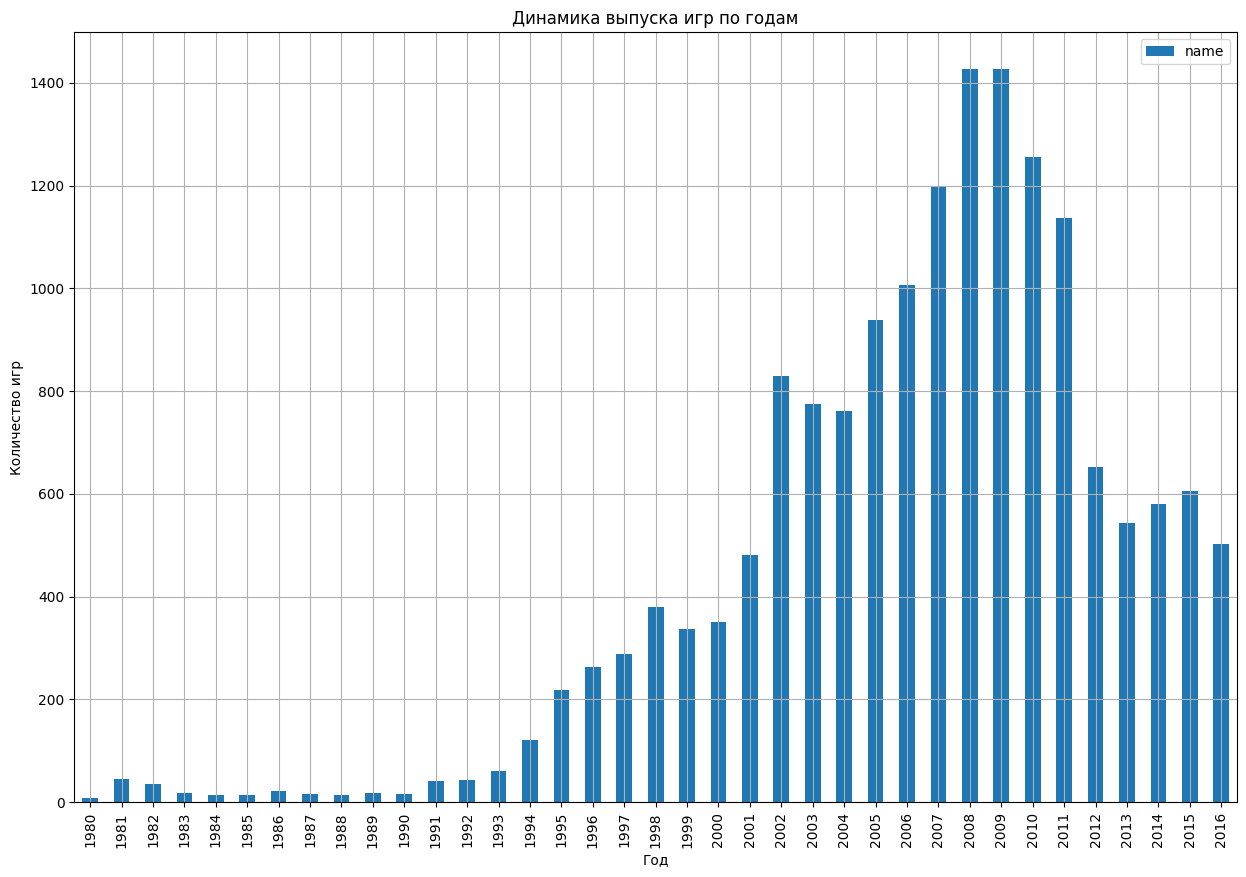

In [27]:
# построим гистограмму
data_games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', 
                        grid=True, figsize=(15, 10))
plt.title('Динамика выпуска игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Согласно гистограмме видно, что количество продаваемых игр было малым до 1991 года, далее начался подъем продаж, самый пик продаж - это 2008 - 2009 года, далее произошел спад, но все равно выпускалось достатчно большое количество игр вплоть до 2016 года. Предполагаю, что такой спад связан со стремительным развитием цифровой индустрии - вследствии чего появились мобильные телефоны, общение в социальных сетях и мессенджерах, игры в мобильных телефонах и поэтому комппьютерные игры ушли на второй план. Думаю, что данные важны за все периоды.

### Как менялись продажи по платформам

In [28]:
# составим таблицу с общей суммой продаж по каждой платформе
data_total_sales = pd.pivot_table(data_games, index=['platform'], values='total_sales', aggfunc='sum')
data_total_sales = data_total_sales.sort_values('total_sales',ascending=False)
data_total_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Видим, что максимальные продажи присуще платформам - PS2, X360, PS3, Wii, DS, PS. Построим графики распределение по годам для этих платформ.

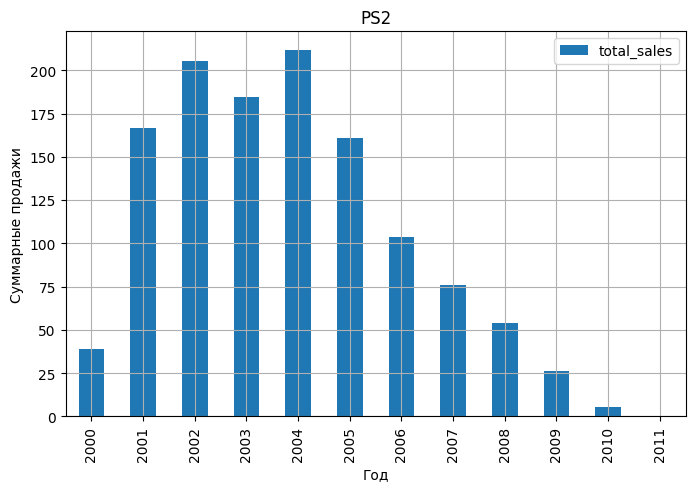

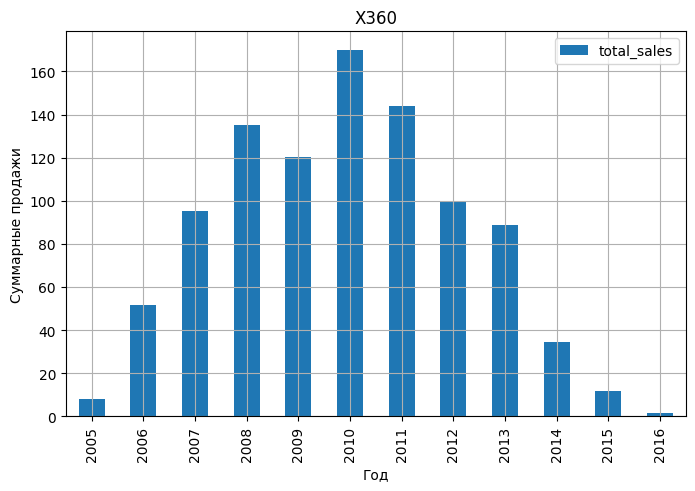

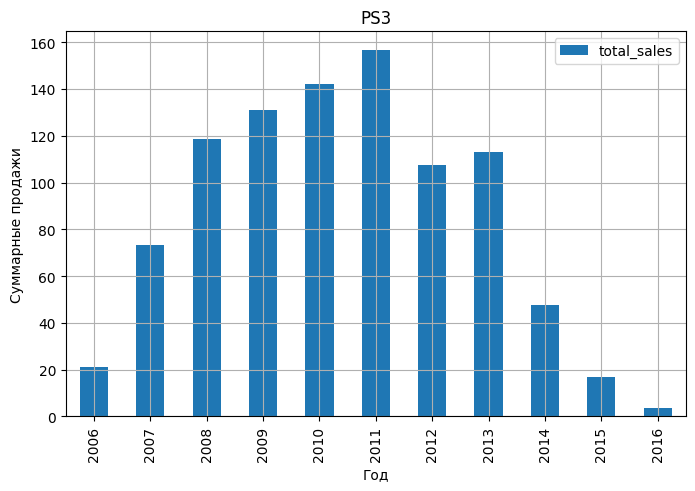

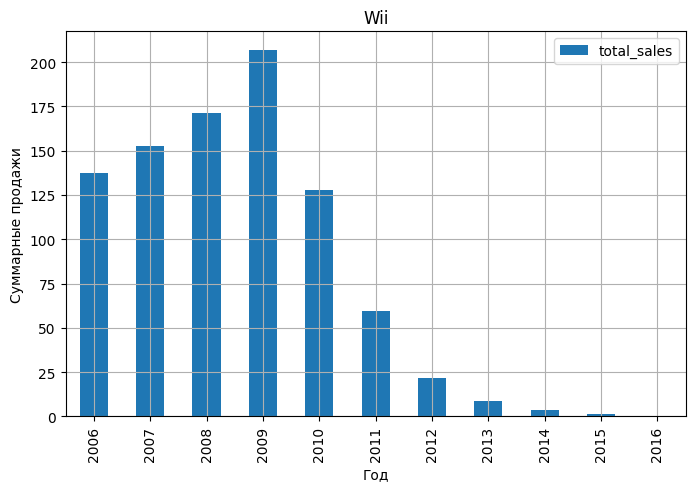

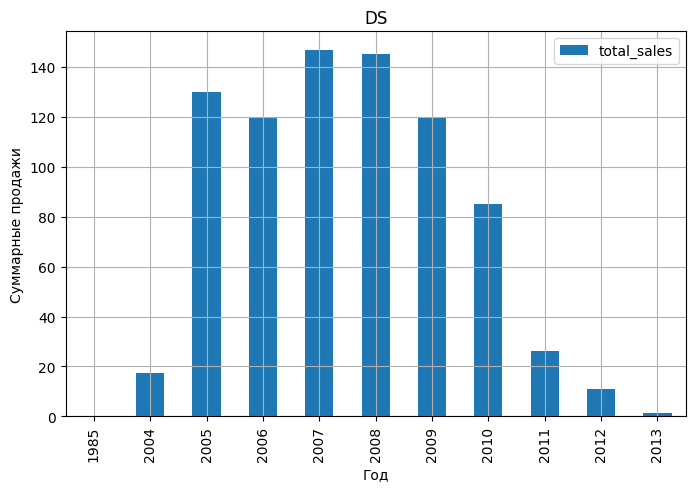

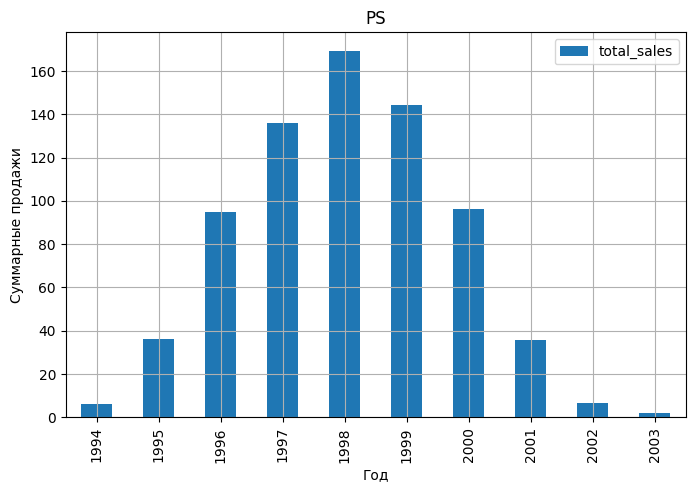

In [29]:
# построим гистограммы распределения суммарных продаж топа платформ
for platform in data_total_sales.index[:6]:
    (data_games
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', grid=True, figsize=(8, 5))
    )
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Cуммарные продажи')
    plt.show()

PS2: видим продажи с 2000 по 2010 года

Х360: видим продажи с 2005 по 2016 года

PS3: видим продажи с 2006 по 2016 года
Wii: видим продажи с 2006 по 2015 года

DS: видим продажи с 2004 по 2013 года

PS: видим продажи с 1994 по 2003 года

В среднем можно сказать, что платформы существуют 10 лет; также видно, что платформы набирают максимальную популярность в среднем около 4 лет, далее идет пик продаж около 3 лет и соответственно спад.

### Актуальные данные

 Думаю, что актуальным периодом для исследования можно считать предшествующие 2017 году - пять лет, получается, что будем рассматривать данные за 2012, 2013, 2014, 2015, 2016 года (года ранее 2012 не берем в учет). Этих данных будет достаточно, чтобы построить прогноз на 2017 год.

### Какие платформы лидируют по продажам, растут или падают? 

In [30]:
actual_period = data_games[data_games['year_of_release'] >= 2012]
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,0,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01


In [31]:
# составим таблицу с общей суммой продаж по каждой платформе c 2012 по 2016 года
data_actual_period = pd.pivot_table(actual_period, index=['platform'], values='total_sales', aggfunc='sum')
data_actual_period = data_actual_period.sort_values('total_sales',ascending=False)
data_actual_period

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Видим, что максимальные продажи за период 2012-2016 годов присуще платформам - PS4, PS3, X360, 3DS, XOne. Этот список отличается от списка за весь период продаж. Построим графики распределение по годам для этих платформ.

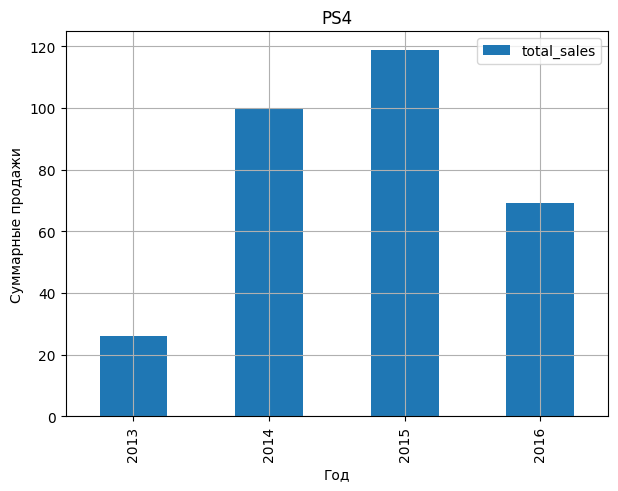

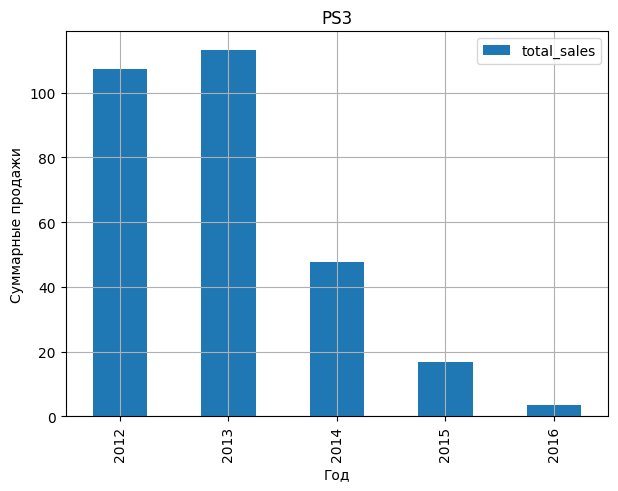

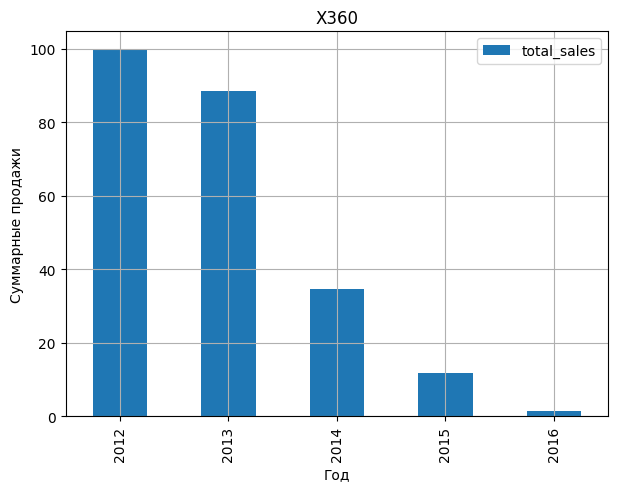

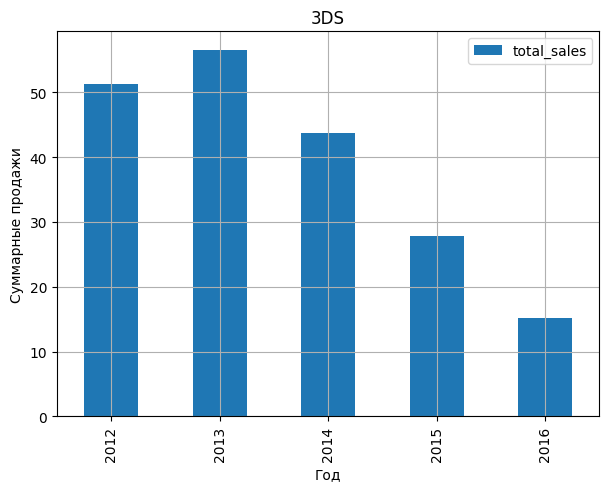

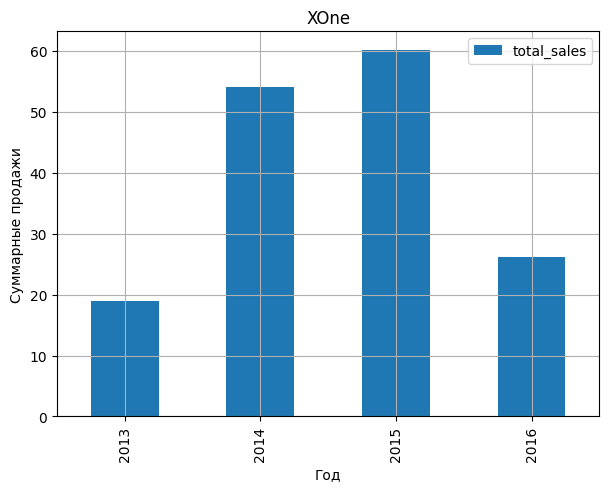

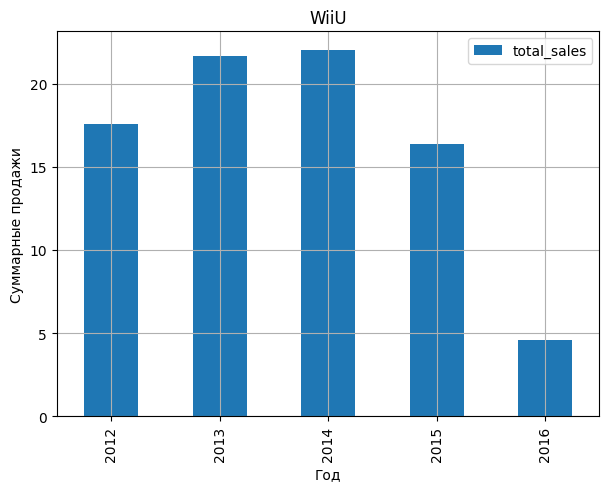

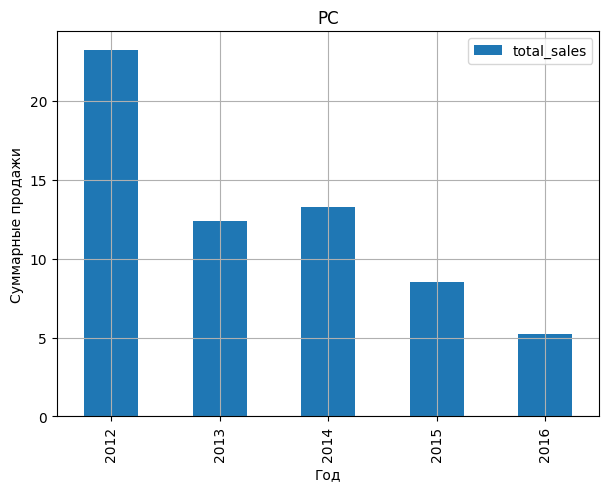

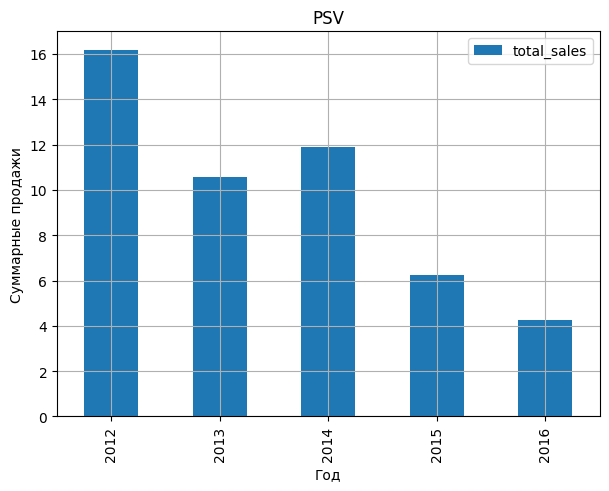

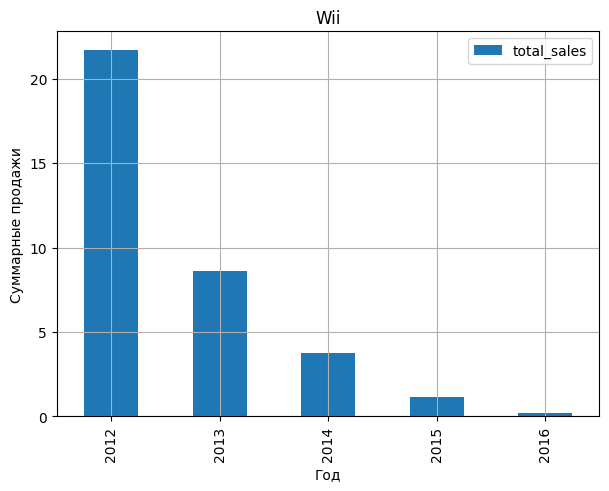

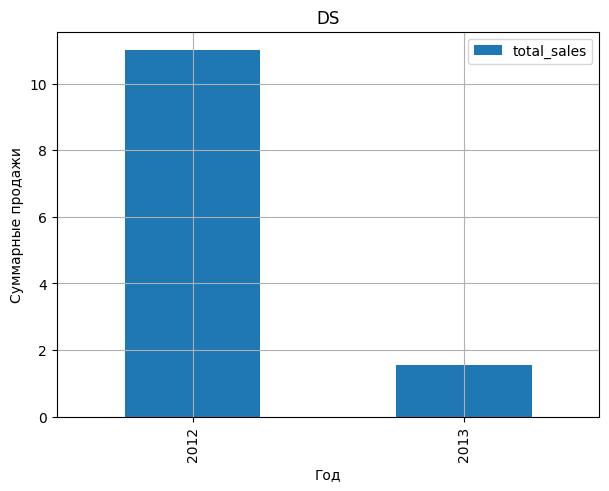

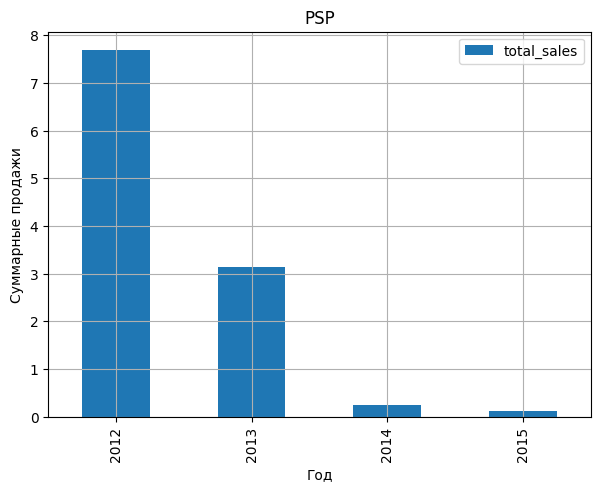

In [32]:
# построим гистограммы распределения суммарных продаж топа платформ за период c 2012 по 2016 годов
for platform in data_actual_period.index:
    (actual_period
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', grid=True, figsize=(7, 5))
    )
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Cуммарные продажи')
    plt.show()

Видим, что максимальные продажи за период 2012-2016 годов присуще платформам - PS4, PS3, X360, 3DS, XOne. Самые низкие продажи - у PSP.

Достаточное падение по продажам видим по платформам - PS3, X360, 3DS, PC, PSV, Wii, DS и PSP. 

Потенциально прибыльными платформами можно считать - PS4, Wii, XOne.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

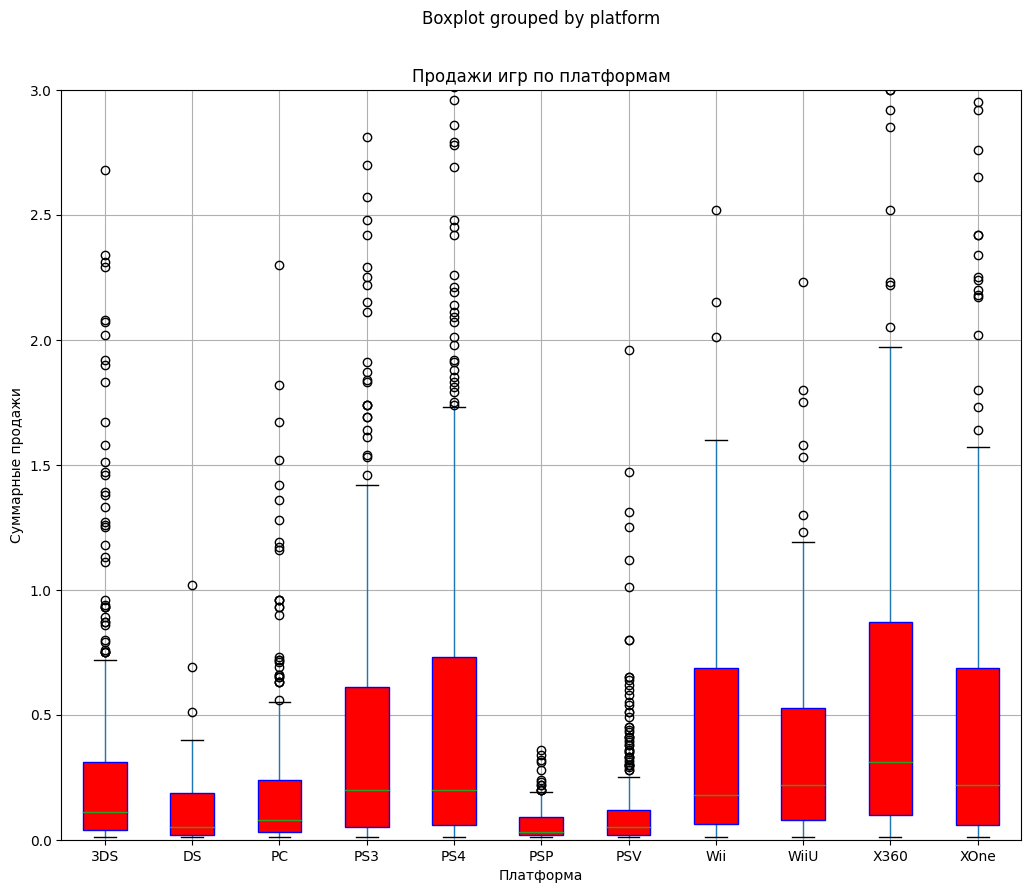

In [33]:
# построим ящик с усами по глобальным продажам игр по платформам за актуальный период
actual_period.boxplot(by='platform', column=['total_sales'], figsize=(12,10), patch_artist=True, 
                      boxprops=dict(facecolor='r', color='b'))
plt.ylim(0,3)
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

Согласно графика, видим, что все платформы имеют выбросы, максимальные продажи у платформы - X360, продажи у платформ поменьше, но рядом с Х360 - PS4, Wii и ХOne. Самые низкие продажи у платформ - PSP, PSV.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

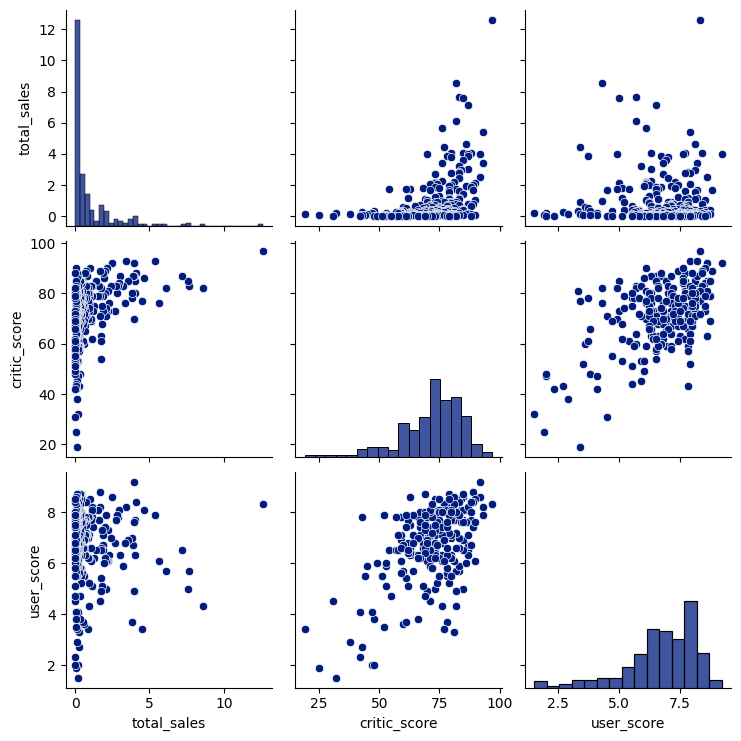

In [34]:
# посмотрим на примере PS4 - самая популярная платформа
# и отфильтруем нулевые выбросы
actual_period = actual_period.query('user_score > 0 and critic_score > 0 and total_sales > 0')
sns.set_palette("dark")
sns.pairplot(actual_period[actual_period.platform == 'PS4'][['total_sales', 'critic_score', 'user_score']]) 
plt.show()

In [35]:
# видим нулевые выбросы, это пропуски, которые были заменены на 0, используем корреляцию Спирмена, чтобы отбросить их
corr_1 = (actual_period[actual_period.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr(method='spearman'))
corr_1.style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.507829,-0.032430
critic_score,0.507829,1.000000,0.433309
user_score,-0.032430,0.433309,1.000000


На сильную положительную корреляцию указывает корреляция между user_score и critic_score - 0,797199, остальные связи являются слабыми.

### Соотношение вывода с продажами игр на других платформах

In [36]:
# посмотрим на таблицу корреляции для платформы PS3
corr_2 = (actual_period[actual_period.platform == "PS3"][['total_sales', 'critic_score', 'user_score']].corr(method='spearman'))
corr_2.style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.587319,0.117907
critic_score,0.587319,1.000000,0.445057
user_score,0.117907,0.445057,1.000000


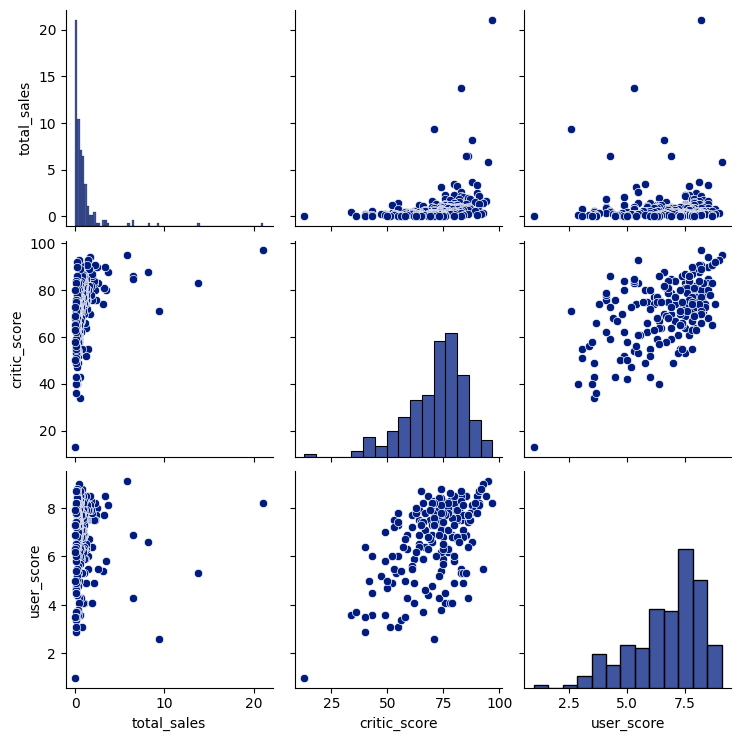

In [37]:
# построим диаграммы рессеяния для PS3
# и отфильтруем нулевые выбросы
actual_period = actual_period.query('user_score > 0 and critic_score > 0 and total_sales > 0')
sns.set_palette("dark")
sns.pairplot(actual_period[actual_period.platform == 'PS3'][['total_sales', 'critic_score', 'user_score']]) 
plt.show()

In [38]:
# посмотрим на таблицу корреляции для платформы X360
corr_3 = (actual_period[actual_period.platform == "X360"][['total_sales', 'critic_score', 'user_score']].corr(method='spearman'))
corr_3.style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.636088,0.196299
critic_score,0.636088,1.000000,0.489646
user_score,0.196299,0.489646,1.000000


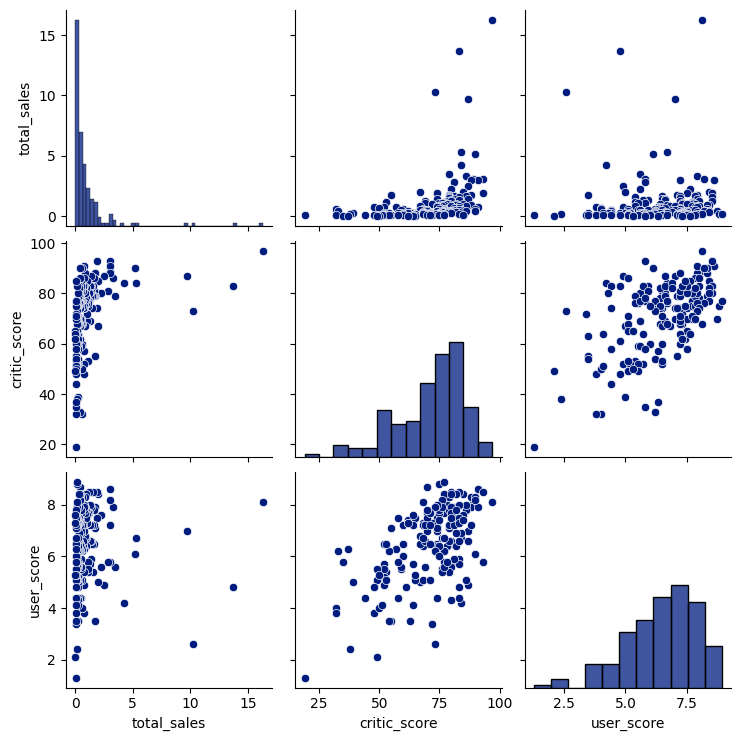

In [39]:
# построим диаграммы рессеяния для Х360
# и отфильтруем нулевые выбросы
actual_period = actual_period.query('user_score > 0 and critic_score > 0 and total_sales > 0')
sns.set_palette("dark")
sns.pairplot(actual_period[actual_period.platform == 'X360'][['total_sales', 'critic_score', 'user_score']]) 
plt.show()

In [40]:
# посмотрим на таблицу корреляции для платформы 3DS
corr_4 = (actual_period[actual_period.platform == "3DS"][['total_sales', 'critic_score', 'user_score']].corr(method='spearman'))
corr_4.style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.343112,0.249841
critic_score,0.343112,1.000000,0.782241
user_score,0.249841,0.782241,1.000000


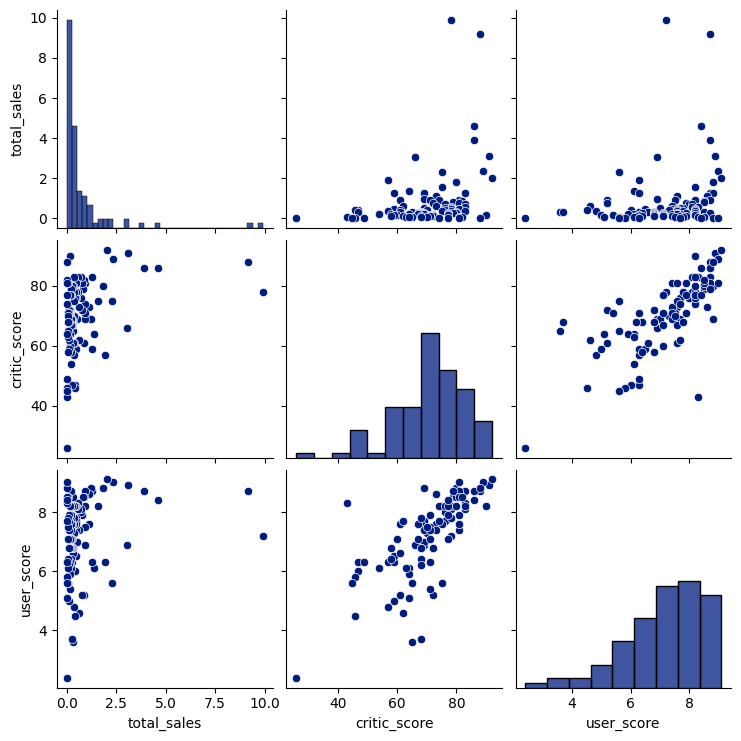

In [41]:
# построим диаграммы рессеяния для 3DS
# и отфильтруем нулевые выбросы
actual_period = actual_period.query('user_score > 0 and critic_score > 0 and total_sales > 0')
sns.set_palette("dark")
sns.pairplot(actual_period[actual_period.platform == '3DS'][['total_sales', 'critic_score', 'user_score']]) 
plt.show()

In [42]:
# посмотрим на таблицу корреляции для платформы Xone
corr_5 = (actual_period[actual_period.platform == "XOne"][['total_sales', 'critic_score', 'user_score']].corr(method='spearman'))
corr_5.style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1.000000,0.516256,-0.122041
critic_score,0.516256,1.000000,0.346932
user_score,-0.122041,0.346932,1.000000


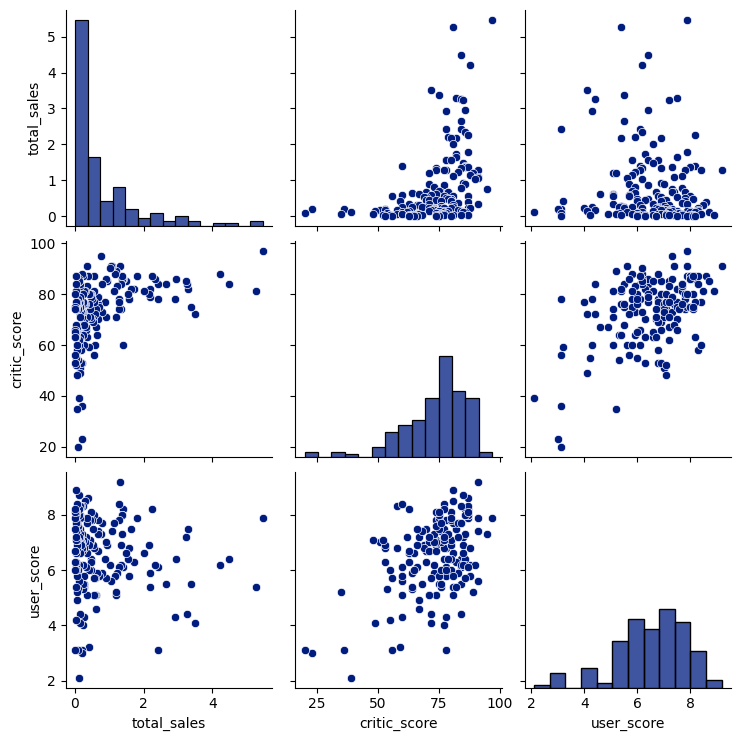

In [43]:
# построим диаграммы рессеяния для XOne
# и отфильтруем нулевые выбросы
actual_period = actual_period.query('user_score > 0 and critic_score > 0 and total_sales > 0')
sns.set_palette("dark")
sns.pairplot(actual_period[actual_period.platform == 'XOne'][['total_sales', 'critic_score', 'user_score']]) 
plt.show()

Самую сильную положительную зависимость можно увидеть для платформы 3DS между user_score и critic_score - 0,907987. Для остальных платформ все зависимости намного слабее.

### Общее распределение игр по жанрам

In [44]:
# посмотрим суммарные продажи по жанрам за актуальный период
actual_period.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values('total_sales', 
                                                                                             ascending=False)

,total_sales
genre,
Shooter,0.570
Sports,0.540
Misc,0.365
Action,0.280
Platform,0.255
Strategy,0.220
Fighting,0.215
Role-Playing,0.210
Simulation,0.200


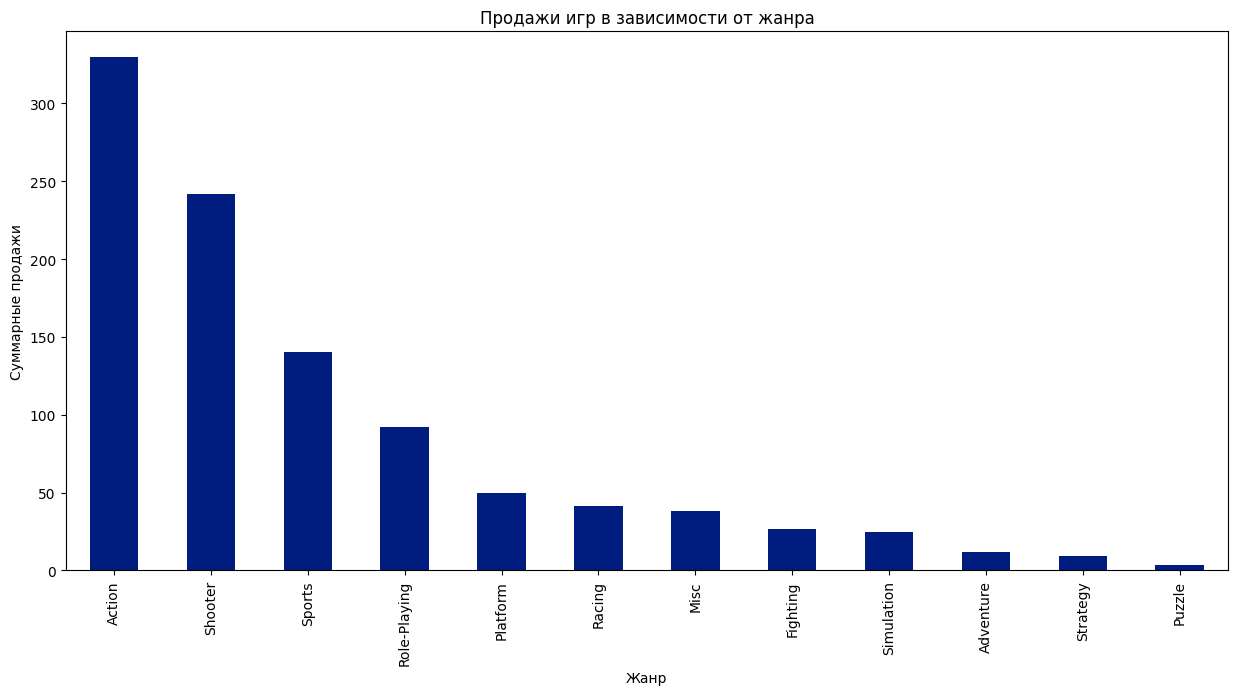

In [45]:
# построим график распреления суммарных продаж относительно жанра за актуальный период
actual_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', 
                                    ascending=False).plot(kind='bar', y='total_sales', figsize=(15, 7), legend=False)
plt.title('Продажи игр в зависимости от жанра')
plt.xlabel('Жанр')
plt.ylabel('Cуммарные продажи')
plt.show()

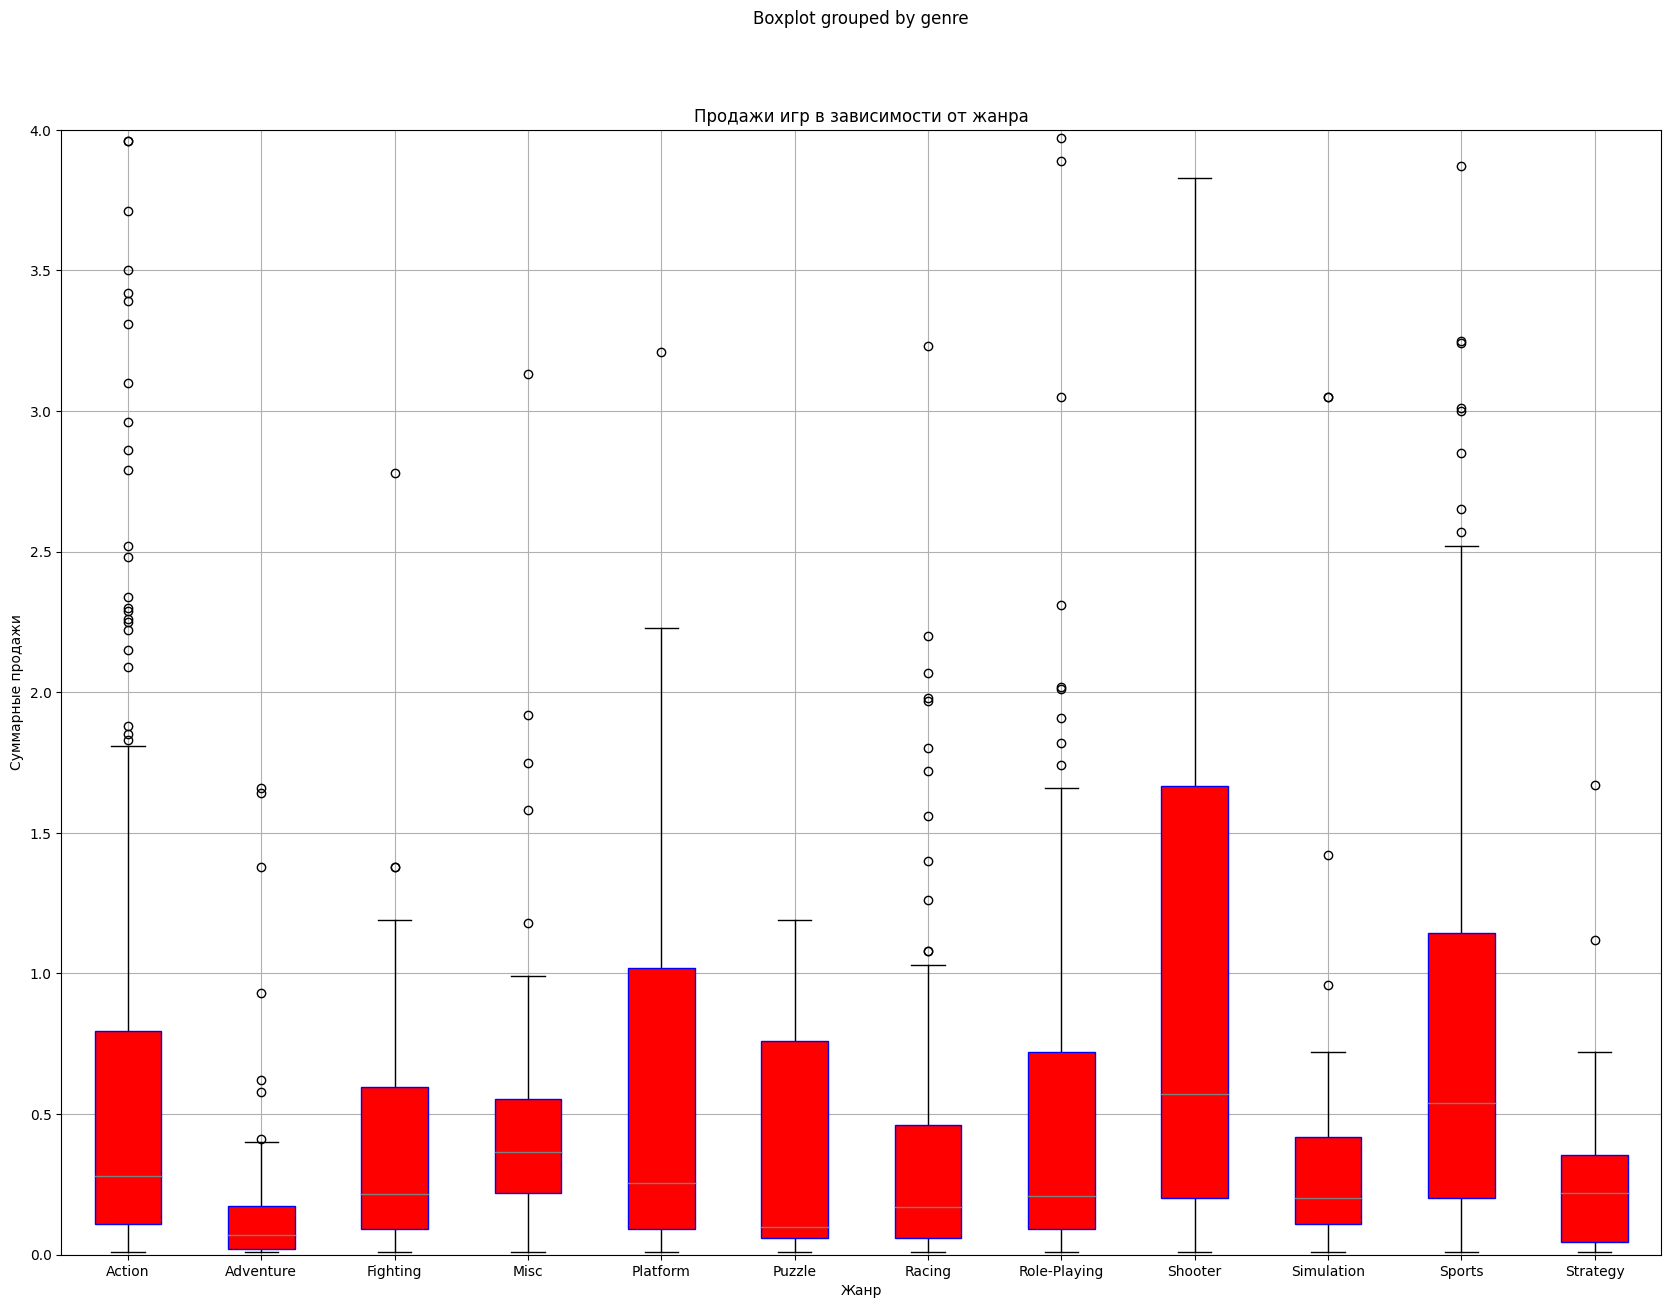

In [46]:
# построим ящик с усами по глобальным продажам игр по жанрам за актуальный период
actual_period.boxplot(by='genre', column=['total_sales'], figsize=(20,15), patch_artist=True, 
                      boxprops=dict(facecolor='r', color='b'))
plt.ylim(0,4)
plt.title('Продажи игр в зависимости от жанра')
plt.xlabel('Жанр')
plt.ylabel('Cуммарные продажи')
plt.show()

С 2012-2016 года в топ-жанров входят - Schooter, Sports и Platform (жанр Shooter значительно выделяется по суммарным продажам относительно других жанров игр). На последнем месте - жанр Puzzle.

По большинству жанров присутствует большое количество выбросов.

**Вывод**

Cогласно исследовательскому анализу было выявлено:
- Пик продаж игр - это 2008 - 2009 года, далее был спад, но все равно выпускалось достаточно большое количество игр вплоть до 2016. 
- Максимальные продажи были у платформ - PS2, X360, PS3, Wii, DS, PS. В среднем платформы существуют 10 лет. Максимальную популярность набирают втечении 4 лет, далее идет пик продаж около 3 лет и соответственно спад.
- Актуальным периодом для дальнейшего исследования взяли 2012-2016 года. Максимальные продажи за этот период присуще платформам - PS4, PS3, X360, 3DS, XOne. Этот список отличается от списка за весь период продаж. Самые низкие продажи - у PSP. Потенциально прибыльными платформами можно считать - PS4, Wii, XOne.
- Сильная положительная корреляция между user_score и critic_score у платформ PS4 и 3DS.
- Самыми популярными жанрами за актуальный период являются - Schooter, Sports и Platform. На последнем месте - жанр Puzzle.

## Портрет пользователя каждого региона

### Анализ данных по популярным платформам, популярным жанрам и рейтингу ESRB в регионе NA

In [47]:
# cохраним в переменную рейтинг продаж по Северной Америке для каждой платформы
platform_na = pd.pivot_table(actual_period, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
platform_na 

,na_sales
platform,
X360,106.99
PS4,84.46
PS3,77.11
XOne,76.03
WiiU,30.69
3DS,28.53
PC,17.72
PSV,8.52
Wii,7.03


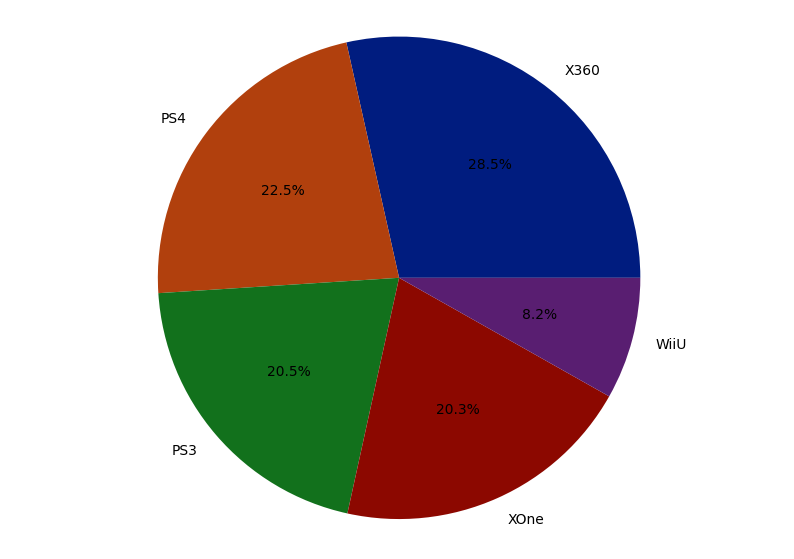

In [48]:
# построим диаграмму для топ-5 платформ по продажам в Северной Америке
plt.figure(figsize=(10,7))
platform_na_graph = platform_na[:5].reset_index()
plt.pie(platform_na_graph['na_sales'],labels=platform_na_graph['platform'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [49]:
# cохраним в переменную рейтинг продаж по Северной Америке для каждого жанра
genre_na = pd.pivot_table(actual_period, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
genre_na

,na_sales
genre,
Action,139.84
Shooter,115.75
Sports,65.83
Role-Playing,36.76
Platform,20.39
Misc,18.89
Racing,13.87
Fighting,12.01
Simulation,5.70


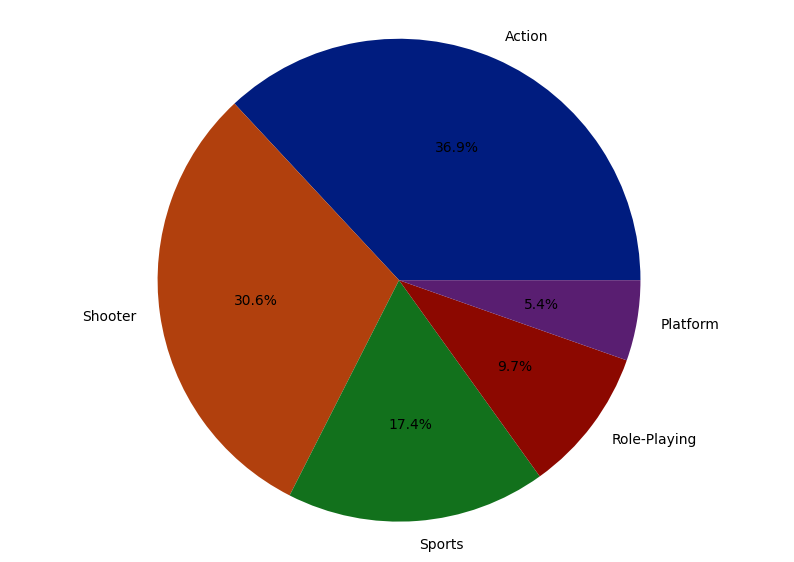

In [50]:
# построим диаграмму для топ-5 жанров по продажам в Северной Америке
plt.figure(figsize=(10,7))
genre_na_graph = genre_na[:5].reset_index()
plt.pie(genre_na_graph['na_sales'],labels=genre_na_graph['genre'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [51]:
# cохраним в переменную рейтинг продаж по Северной Америке для каждого рейтинга
rating_na = pd.pivot_table(actual_period, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
rating_na

,na_sales
rating,
M,217.67
E,99.19
T,61.32
E10+,58.40
0,1.06


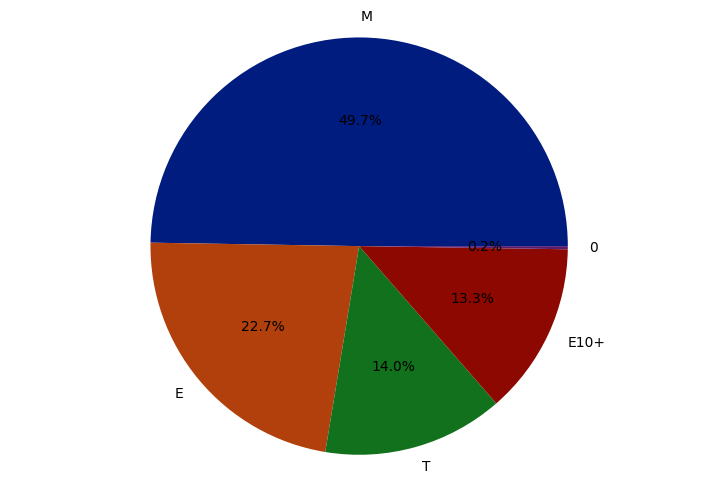

In [52]:
# построим диаграмму для топ-5 рейтингов по продажам в Северной Америке
plt.figure(figsize=(9,6))
rating_na_graph = rating_na.reset_index()
plt.pie(rating_na_graph['na_sales'],labels=rating_na_graph['rating'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Топ-5 платформ по продажам в Северной Америке - X360, PS4, PS3, XOne и 3DS.
Топ-5 жанров по продажам в Северной Америке - Action, Shooter, Sports, Role-Playing	и Misc.
Самым популярным рейтингом по продажам является - М.

### Анализ данных по популярным платформам, популярным жанрам и рейтингу ESRB в регионе EU

In [53]:
# cохраним в переменную рейтинг продаж по Европе для каждой платформы
platform_eu = pd.pivot_table(actual_period, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
platform_eu 

,eu_sales
platform,
PS4,112.44
PS3,78.49
X360,57.15
XOne,42.23
PC,33.71
WiiU,20.42
3DS,20.01
PSV,7.39
Wii,4.10


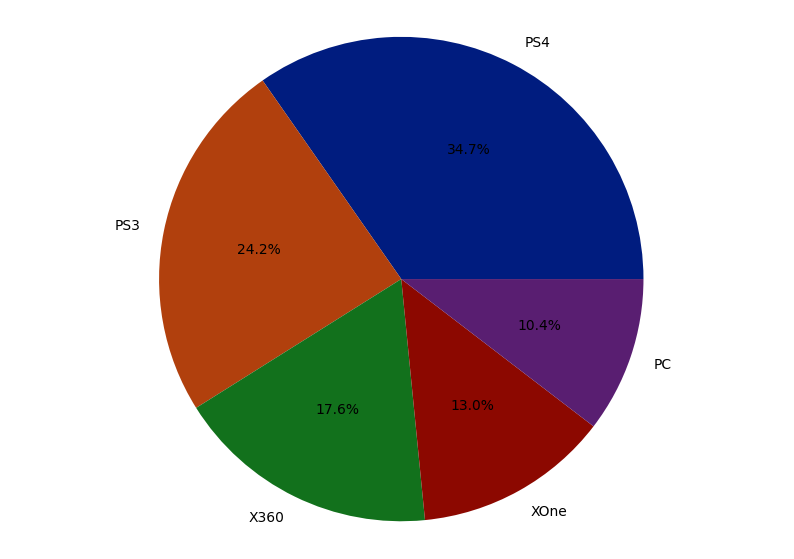

In [54]:
# построим диаграмму для топ-5 платформ по продажам в Европе
plt.figure(figsize=(10,7))
platform_eu_graph = platform_eu[:5].reset_index()
plt.pie(platform_eu_graph['eu_sales'],labels=platform_eu_graph['platform'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [55]:
# cохраним в переменную рейтинг продаж по Европе для каждого жанра
genre_eu = pd.pivot_table(actual_period, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
genre_eu

,eu_sales
genre,
Action,127.81
Shooter,89.26
Sports,53.81
Role-Playing,28.34
Racing,20.84
Platform,16.62
Misc,11.03
Simulation,10.17
Fighting,7.25


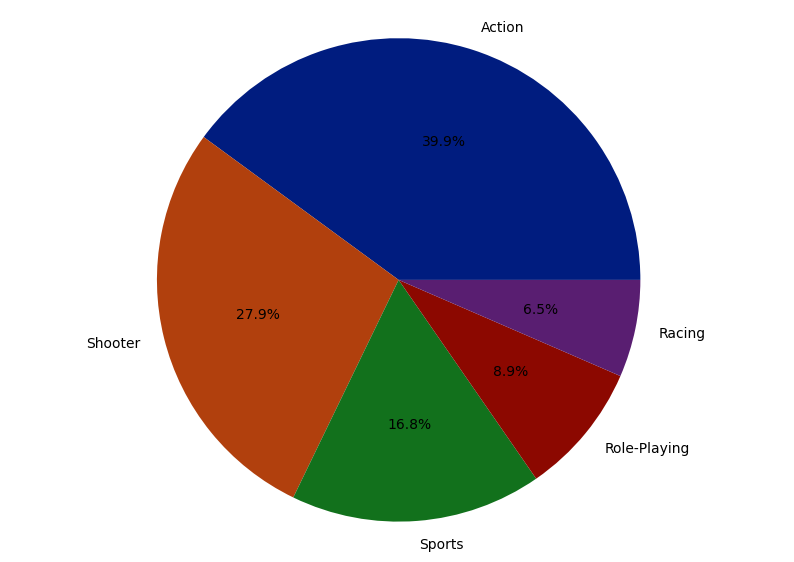

In [56]:
# построим диаграмму для топ-5 жанров по продажам в Европе
plt.figure(figsize=(10,7))
genre_eu_graph = genre_eu[:5].reset_index()
plt.pie(genre_eu_graph['eu_sales'],labels=genre_eu_graph['genre'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [57]:
# cохраним в переменную рейтинг продаж по Европе для каждого рейтинга
rating_eu = pd.pivot_table(actual_period, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
rating_eu

,eu_sales
rating,
M,183.82
E,97.44
T,49.86
E10+,41.46
0,3.41


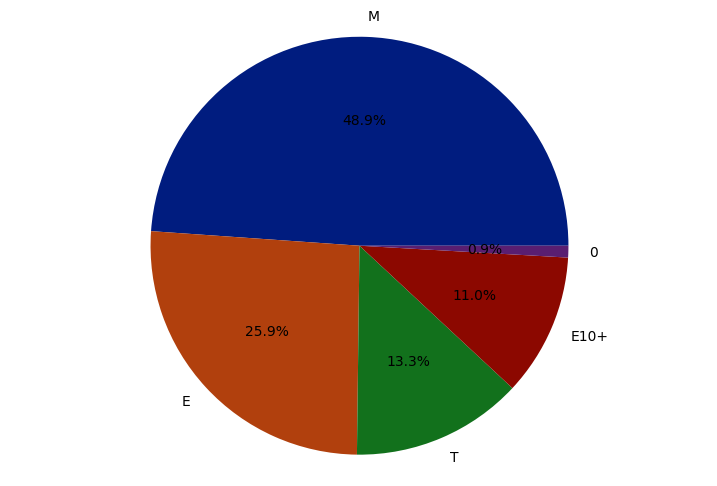

In [58]:
# построим диаграмму для топ-5 рейтингов по продажам в Европе
plt.figure(figsize=(9,6))
rating_eu_graph = rating_eu.reset_index()
plt.pie(rating_eu_graph['eu_sales'],labels=rating_eu_graph['rating'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Топ-5 платформ по продажам в Европе - PS4, PS3, X360, XOne и 3DS. Топ-5 жанров по продажам в Европе - Action, Shooter, Sports, Role-Playing и Misc. Самым популярным рейтингом по продажам является - М.

### Анализ данных по популярным платформам, популярным жанрам и рейтингу ESRB в регионе JP

In [59]:
# cохраним в переменную рейтинг продаж по Японии для каждой платформы
platform_jp = pd.pivot_table(actual_period, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
platform_jp 

,jp_sales
platform,
3DS,26.54
PS3,20.38
WiiU,10.17
PS4,9.43
PSV,7.05
X360,1.38
Wii,1.09
DS,0.37
XOne,0.29


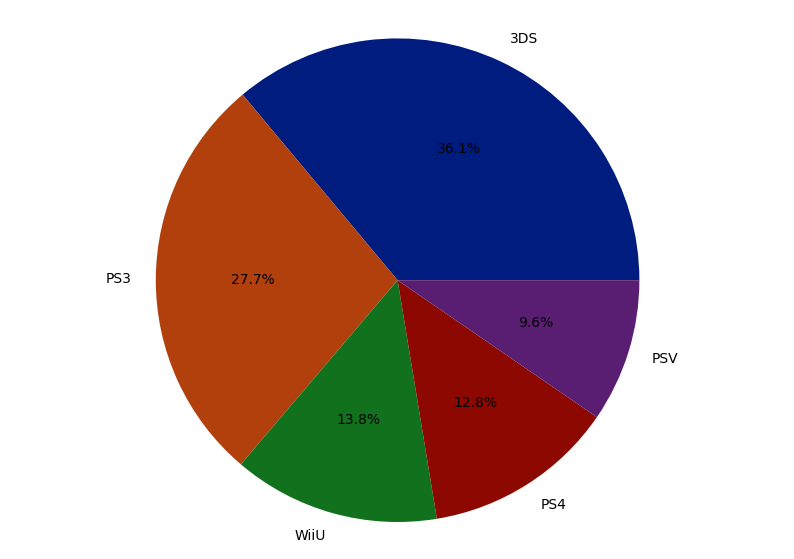

In [60]:
# построим диаграмму для топ-5 платформ по продажам в Японии
plt.figure(figsize=(10,7))
platform_jp_graph = platform_jp[:5].reset_index()
plt.pie(platform_jp_graph['jp_sales'],labels=platform_jp_graph['platform'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [61]:
# cохраним в переменную рейтинг продаж по Японии для каждого жанра
genre_jp = pd.pivot_table(actual_period, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
genre_jp

,jp_sales
genre,
Action,20.92
Role-Playing,17.52
Platform,7.96
Shooter,7.62
Simulation,7.29
Misc,4.78
Fighting,3.98
Sports,2.46
Racing,2.13


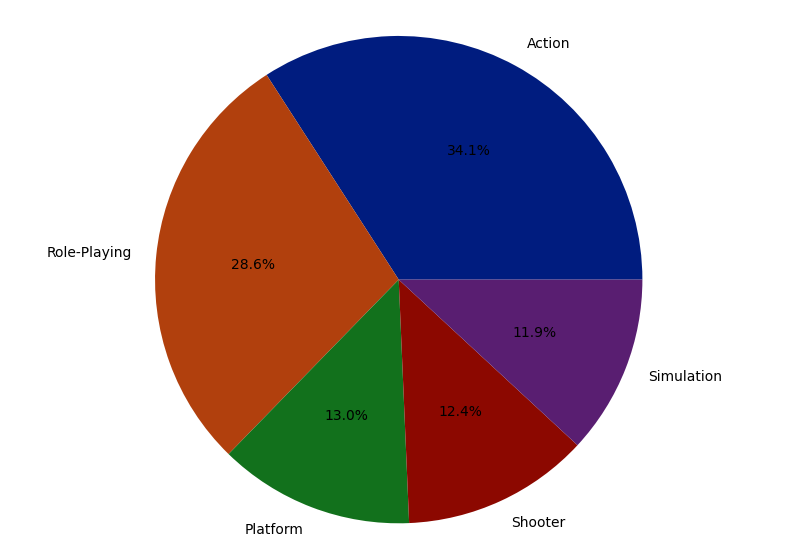

In [62]:
# построим диаграмму для топ-5 жанров по продажам в Японии
plt.figure(figsize=(10,7))
genre_jp_graph = genre_jp[:5].reset_index()
plt.pie(genre_jp_graph['jp_sales'],labels=genre_jp_graph['genre'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [63]:
# cохраним в переменную рейтинг продаж по Японии для каждого рейтинга
rating_jp = pd.pivot_table(actual_period, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
rating_jp

,jp_sales
rating,
E,26.79
T,21.86
M,20.02
E10+,7.95
0,0.23


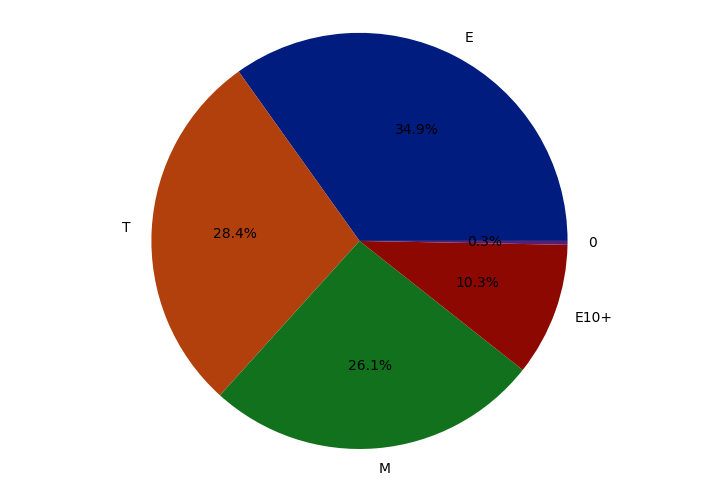

In [64]:
# построим диаграмму для топ-5 рейтингов по продажам в Японии
plt.figure(figsize=(9,6))
rating_jp_graph = rating_jp.reset_index()
plt.pie(rating_jp_graph['jp_sales'],labels=rating_jp_graph['rating'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Топ-5 платформ по продажам в Японии - 3DS, PS3, PSV,PS4 и Wii. Топ-5 жанров по продажам в Японии - Role-Playing, Action, Misc, Simulation и Fighting. Самый популярный рейтинг по продажам не определен, второй по популярности - Е.

**Вывод**

Исходя из полученных данных, выяснили, что в Северной Америке предпочитают игры на платформе Х360 жанра Action с рейтингом М. В Европе игры на платформе PS4 жанра Action с рейтингом М. В Японии же на платформе 3DS жанра Role-Playing с рейтингом Е.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза Н1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [65]:
alpha = 0.05
results = st.ttest_ind(
    actual_period.loc[actual_period['platform'] == 'XOne', 'user_score'].dropna(),
    actual_period.loc[actual_period['platform'] == 'PC', 'user_score'].dropna(),
    equal_var=False,
    alternative='two-sided'
)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую минуту')

0.5926561176517491
Не получилось отвергнуть нулевую минуту


### Средние пользовательские рейтинги жанров Action и Sports разные

Гипотеза Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Гипотеза Н1: Средние пользовательские рейтинги платформ Action и Sports не одинаковые.

In [66]:
alpha = 0.05
results = st.ttest_ind(
    actual_period.loc[actual_period['genre'] == 'Action', 'user_score'].dropna(),
    actual_period.loc[actual_period['genre'] == 'Sports', 'user_score'].dropna(),
    equal_var=False,
    alternative='two-sided'
)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую минуту')

8.926417011727624e-14
Отвергаем нулевую гипотезу


**Вывод**

Первая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтвердилась. Это означает, что пользователи ставят примерно одинаковые оценки играм на плаформах Xbox One и PC.

Во второй гипотезе задание не удовлетворяет условия для составления нулевой гипотезы, т.к. сравнимаемые величины не равны. Для решения поменяли условия, если отвергнем нулевую гипотезу, значит подтвердим, что рейтинги разные. 
Было определено, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

1. Цель проекта - выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


2. В пункте Загрузка и предобработка данных было выполнено:
- привели названия столбцов к нижнему регистру;
- изменили тип данных столбцов Year_of_Release и Critic_Score на int64, столбец User_Score на float64;
- обработали пропуски в столбцах name, year_of_release, critic_score, user_score и rating. Отсутствие данных — это информация о том, что ни рейтинговое агентство ESRB, ни эксперты и пользователи не захотели или не смогли оценить эти игры. Либо как вариант, что какой-то технический фактор причастен к такому большому количеству пропусков;
- добавили новый столбец total_sales - суммарные продажи во всех регионах.


3. Cогласно исследовательскому анализу было выявлено:
- пик продаж игр - это 2008 - 2009 года, далее был спад, но все равно выпускалось достаточно большое количество игр вплоть до 2016;
- максимальные продажи были у платформ - PS2, X360, PS3, Wii, DS, PS. В среднем платформы существуют 10 лет. Максимальную популярность набирают втечении 4 лет, далее идет пик продаж около 3 лет и соответственно спад;
- актуальным периодом для дальнейшего был взят 2012-2016 года. Максимальные продажи за этот период присуще платформам - PS4, PS3, X360, 3DS, XOne. Этот список отличается от списка за весь период продаж. Самые низкие продажи - у PSP. Потенциально прибыльными платформами можно считать - PS4, Wii, XOne.
- Сильная положительная корреляция между user_score и critic_score у платформ PS4 и 3DS. Самыми популярными жанрами за актуальный период являются - Schooter, Sports и Platform. На последнем месте - жанр Puzzle.
- были построены графики распределения, графики "ящик с усами" и матрицы корреляции, благодаря которым были сделаны выводы выше.


4. Проанализировав данные, в том числе при помощи визуализации ввиде диаграмм составили портрет пользвателя для каждого региона: в Северной Америке предпочитают игры на платформе Х360 жанра Action с рейтингом М. В Европе игры на платформе PS4 жанра Action с рейтингом М. В Японии же на платформе 3DS жанра Role-Playing с рейтингом Е.


5. И подтвердили гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и ,что средние пользовательские рейтинги платформ Action и Sports разные.


6. Рекомендации для рекламных кампаний: рекламные кампании должны быть направлены на игры платформы Х360 жанра Action с рейтингом М для пользователей Северной Америки, для европейских пользвателей на игры для  платформы PS4 жанра Action с рейтингом М и для японских пользвателей на игры для платформы 3DS жанра Role-Playing с рейтингом Е.

Спасибо за внимание!